# Customer Segmentation in Python using K-Means
 
Suppose you have a company that provides loyalty cards and wants to analyse its customers based on the information extracted from the loyalty cards. This will not only help us target them with the right markeing campaigns but it will helps us understand what is our loyalty base and customer churn. 

The higher the customer churn, the more we would need to improve something within our business model as we cannot retain customers.

We can segment customers based on their shopping habits. 

Note the dataset is quite large and we will need to use machine learning algorithms to help us achieve this.

This notebook will show you how to do customer segmentation based on customer behaviour using the K-Means algorithm in Python. 


You can download the data from  https://archive.ics.uci.edu/ml/datasets/online+retail .

-----------------

**Plan Of Attack**


Before we get into the process, I will give you a brief on what kind of steps we will get.
- Gather the data 
- Explore the data with ```pandas```
- Pre-process the data and engineer new metrics
- Cluster the data using the ```scikit-learn``` package
- Interpret the result

In [1]:
# install the relevant packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline 

```%matplotlib inline``` : With this line the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.

## Get the data and explore data using  ```  pandas```



In [2]:
 # Upload the csv file onto your notebook and assign it to a variable called data 
    
 # Use the function encoding='iso-8859-1' when you get an encoding error using pandas
    # Try encoding='latin1' for Macs

data = pd.read_csv('Online_retail_data.csv', encoding='iso-8859-1')

You can use this code to upload .xlsx files too.
Although .csv files upload time is faster. 


```python
>>> df = pd.read_excel('dataset.xlsx', nrow = 1500)  
```

Using the pandas library to explore the data 

In [3]:
# choose the number of top rows you want to see  

data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [4]:
# choose the number of top rows you want to see  

data.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


See information about the data using ```data.info``` - note it has different values of non-null rows.

The overall number of rows are **541909***.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Extract information only from column ```'Country'``` using slicing ```[]```.

Note the column name is a string (text) hence we use an apostrophe **'** to denote that.

In [6]:
data['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 541909, dtype: object

Cxtracting rows from column 'CustomerID' whihc are not null with the function ```notna()```

In [7]:
data['CustomerID'].notna()

# it gives us a boolean (True/False) of the rows

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

Here we are filtering our data by passing the boolean values from our series with no emptry rows of CustomerID to our data. and assinging it back to the dataframe.

Notive when using ```.info``` again, the number of rows has reduced to **406829 entries**.

In [8]:
# Assign the series of boolean values to a variable called 'extract_customers'
extract_customers = data['CustomerID'].notna()  

# pass the boolean values into the data so that 
data = data[ extract_customers ]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Sampling our data using a the function ```sample()``` and the parameters **n** and **random_state**. 

Checking the shape of our data_sample using the function  ```shape```.

In [9]:
data_sample = data.sample(n = 1000, random_state = 42) # changing the random state will give you a different sample 

data_sample.shape

(1000, 8)

In [10]:
data_sample.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,07/01/2011 12:14,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,15/09/2011 13:51,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,03/08/2011 10:10,0.85,12921.0,United Kingdom


How many countries do we export to?

Use ```.unique()``` to find the unique number of rows in the ``'Country'`` column.

In [11]:
data_sample['Country'].unique()

array(['United Kingdom', 'France', 'Norway', 'Belgium', 'Germany',
       'Denmark', 'Unspecified', 'Malta', 'Finland', 'Austria',
       'Switzerland', 'Netherlands', 'Spain', 'EIRE',
       'United Arab Emirates', 'Italy', 'Portugal', 'Israel', 'Australia',
       'Channel Islands', 'European Community', 'Lebanon'], dtype=object)

Find how many unique customers we have using the ```.value_counts()``` function.

In [12]:
data_sample['CustomerID'].value_counts() # Return a Series containing counts of unique values

# There are 680 unique customers

17841.0    16
14096.0    15
14606.0    13
14911.0    13
12748.0    11
           ..
12435.0     1
16418.0     1
13475.0     1
17965.0     1
16401.0     1
Name: CustomerID, Length: 680, dtype: int64

In [13]:
# Similarly for the number of stocks in the dataframe

data_sample['StockCode'].value_counts()

85123A    8
22382     7
22423     6
22625     6
21232     5
         ..
16052     1
22817     1
22414     1
22896     1
22969     1
Name: StockCode, Length: 714, dtype: int64

Using the ```print()``` and ```.format()``` functions to output both variables within a sentence.

In [14]:
max_no = data_sample['Quantity'].max()

min_no = data_sample['Quantity'].min()

print('The maximum number of units we have sold per transation is {} and the max number of returns per transaction is {}'.format(max_no,min_no))

The maximum number of units we have sold per transation is 600 and the max number of returns per transaction is -12


Sorting the values in the data by the Invoice Date using ```.sort_values()```.

In [15]:
data_sample = data_sample.sort_values(by='InvoiceDate')

data_sample.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
77841,542789,23233,WRAP POPPIES DESIGN,50,01/02/2011 10:38,0.42,17511.0,United Kingdom
78492,542887,21931,JUMBO STORAGE BAG SUKI,20,01/02/2011 13:10,1.95,12373.0,Austria


## Data Preprocessing - Create RFM Table


Usually the data is not in the right format we need to fit algorothms and make predictions so we would need to 'engineer' the metrics we need and process the data before we fit any algorithms to it.

----

**Recency** : when did the customer buy the product for last time.

**Frequency** : how frequently does the customer buy the product.

**Monetary value**: how much does the customer pay for the product.

We create the RFM table and use it to create a segmentation between cutomers. 

---

To make the RFM table, we want to: 

-  Subtract the snapshot date with the date where the transaction occurred, for *recency column*.
-  Count how much transactions by each customer, for the *frequency column*.
-  Sum all transactions for each customer, for the *monetary value column*.

In [16]:
data_sample['InvoiceDate']  # data type: object - need to change it to datatime 

77841     01/02/2011 10:38
78492     01/02/2011 13:10
78561     01/02/2011 13:25
78625     01/02/2011 13:26
78657     01/02/2011 13:36
                ...       
428330    31/10/2011 09:48
428950    31/10/2011 12:21
429059    31/10/2011 13:05
429722    31/10/2011 14:09
431367    31/10/2011 15:01
Name: InvoiceDate, Length: 1000, dtype: object

Using the ``` pd.to_datetime()``` function to convert the 'InvoiceDate' series into a datatime series so we can extract the dates only.

*Some more information on the datetime package ca be found here: https://docs.python.org/3/library/datetime.html*

In [17]:
import datetime 
from datetime import datetime, timedelta

pd.to_datetime( data_sample['InvoiceDate'] )

77841    2011-01-02 10:38:00
78492    2011-01-02 13:10:00
78561    2011-01-02 13:25:00
78625    2011-01-02 13:26:00
78657    2011-01-02 13:36:00
                 ...        
428330   2011-10-31 09:48:00
428950   2011-10-31 12:21:00
429059   2011-10-31 13:05:00
429722   2011-10-31 14:09:00
431367   2011-10-31 15:01:00
Name: InvoiceDate, Length: 1000, dtype: datetime64[ns]

Creating a new column called **'New_Invoice_Date'** where we will store the new datetime series we created from **' InvoiceDate'**.

In [18]:
data_sample['New_Invoice_Date'] = pd.to_datetime( data_sample['InvoiceDate'] ) # the data type is now datetime64

In [19]:
data_sample.head(3)

# Notice the difference in the two columns 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,New_Invoice_Date
77841,542789,23233,WRAP POPPIES DESIGN,50,01/02/2011 10:38,0.42,17511.0,United Kingdom,2011-01-02 10:38:00
78492,542887,21931,JUMBO STORAGE BAG SUKI,20,01/02/2011 13:10,1.95,12373.0,Austria,2011-01-02 13:10:00
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,01/02/2011 13:25,8.50,15311.0,United Kingdom,2011-01-02 13:25:00


In [20]:
# We can now get rid of the InvoiceDate column 

data_sample = data_sample.drop(['InvoiceDate'], axis=1)

data_sample.head(2)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,New_Invoice_Date
77841,542789,23233,WRAP POPPIES DESIGN,50,0.42,17511.0,United Kingdom,2011-01-02 10:38:00
78492,542887,21931,JUMBO STORAGE BAG SUKI,20,1.95,12373.0,Austria,2011-01-02 13:10:00


We are only interested in the dates from the data so we use the function ``` .dt.date``` to extract the dates only and assign it back to the data_sample.

In [21]:
data_sample["New_Invoice_Date"] = data_sample["New_Invoice_Date"].dt.date

data_sample.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,New_Invoice_Date
77841,542789,23233,WRAP POPPIES DESIGN,50,0.42,17511.0,United Kingdom,2011-01-02
78492,542887,21931,JUMBO STORAGE BAG SUKI,20,1.95,12373.0,Austria,2011-01-02
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,8.50,15311.0,United Kingdom,2011-01-02


### Creating the RFM table 

Create a column which has the total number of money spent per transaction, call it **TotalSum**. 

Using the ```*``` as a multiplication between the two series "Quantity" and "UnitPrice".


In [22]:
data_sample["TotalSum"] = data_sample["Quantity"] * data_sample["UnitPrice"]

data_sample.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,New_Invoice_Date,TotalSum
77841,542789,23233,WRAP POPPIES DESIGN,50,0.42,17511.0,United Kingdom,2011-01-02,21.0
78492,542887,21931,JUMBO STORAGE BAG SUKI,20,1.95,12373.0,Austria,2011-01-02,39.0
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,8.50,15311.0,United Kingdom,2011-01-02,17.0


A duration expressing the difference between two date, time, or datetime instances to microsecond resolution.

In [23]:
timedelta(days=1) 

datetime.timedelta(days=1)

Get the most recent transaction - the max transaction.

In [24]:
max(data_sample['New_Invoice_Date']) 

datetime.date(2011, 12, 10)

Create date variable that records recency - a date which will be the cut off date for transactions. 

The 'cut off date' will be the date after the last transaction has happened, i.e. the max of the **'New_Invoice_Date' + 1 more day**.

In [25]:
snapshot_date = max(data_sample['New_Invoice_Date']) + timedelta(days=1)

snapshot_date # That's the 11th December 2011

datetime.date(2011, 12, 11)

Now we want to use the ```groupby()``` function so we can group/aggregate the data (for the columns R,F,M ) by each customer. 

The ```groupby()``` function is quite important when wrangling data, here is a link to the documentation if you want to find out more https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html.

In [26]:
# Adding the Frequency per customer column to a new dataframe called 'RFM_customers' .groupby(by= ['CustomerID']).count()

RFM_customers = data_sample[['CustomerID','InvoiceNo']].groupby(by= ['CustomerID']).count()

RFM_customers.head(3)

,InvoiceNo
CustomerID,
12352.0,2
12371.0,1
12373.0,1


In [27]:
# Adding the Total Spend per customer to our new table using the .groupby(by= ['CustomerID']).sum() function

RFM_customers['TotalSum'] = data_sample[['CustomerID','TotalSum']].groupby(by= ['CustomerID']).sum()
RFM_customers.head(3)

,InvoiceNo,TotalSum
CustomerID,,
12352.0,2,29.85
12371.0,1,17.00
12373.0,1,39.00


Adding the Recency by customer to our new table using the ```.groupby(by= ['CustomerID']).agg()``` function.

Within the ```.agg()``` function we have passed the ```{'New_Invoice_Date': lambda x: (snapshot_date - x.max()).days}``` instruction which uses a lambda function. If you want to learn more about lambda functions you can visit https://www.w3schools.com/python/python_lambda.asp.

The function uses the set variable **snapshot_date**.

**It takes each value per customer from the series 'New_Invoice_Date' and finds the max/latest invoice date per customer.**

Note that the lastest invoice date per customer is less than the snapshot_date.

**We take the snapshot_date - the max (latest) invoice date per customer to find when the most recent transaction per customer was made relative to the snapshot_date.**

**The data is then aggregated as the most recent transation day per customer given the snapshot_date.**

Using ```.days``` will give us the total number of days instead of the full datetime.

In [28]:
# Aggregate data by each customer
RFM_customers['New_Invoice_Date'] = data_sample[['CustomerID','New_Invoice_Date']].groupby(['CustomerID']).agg({'New_Invoice_Date': lambda x: (snapshot_date - x.max()).days})


# The new table then becomes
RFM_customers.head(3)

,InvoiceNo,TotalSum,New_Invoice_Date
CustomerID,,,
12352.0,2,29.85,82
12371.0,1,17.00,31
12373.0,1,39.00,343


Here we are using ```.rename()``` to rename out columns to the relevant metric names.

In [30]:
RFM_customers.rename(columns = {'New_Invoice_Date': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [31]:
# Final table

RFM_customers.head(3)

,Frequency,MonetaryValue,Recency
CustomerID,,,
12352.0,2,29.85,82
12371.0,1,17.00,31
12373.0,1,39.00,343


In [43]:
RFM_customers.columns

Index(['Frequency', 'MonetaryValue', 'Recency'], dtype='object')

### Some more data processing 

Using the ```seaborn as sns``` library to plot each column on a different canvas.

See documentation of function here https://seaborn.pydata.org/generated/seaborn.distplot.html .

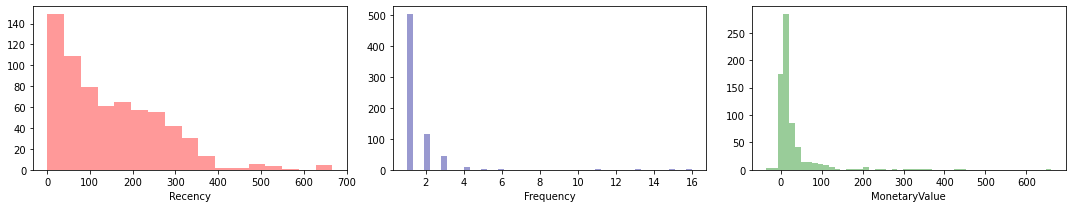

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))

sns.distplot(RFM_customers['Recency'], ax=ax[0], color='red',kde=False)
sns.distplot(RFM_customers['Frequency'], ax=ax[1], color='darkblue', kde=False)
sns.distplot(RFM_customers['MonetaryValue'], ax=ax[2], color='green', kde=False)

plt.tight_layout()

Dealing with the skewness of our data.

Here are two good articles that provide some suggestions on how to deal with skewness of data.

https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16

https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45

In [85]:
from scipy import stats

#create a function that plots distributions skewness

def analyze_skewness(x):
    
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    
    sns.distplot(RFM_customers[x], ax=ax[0,0])
    sns.distplot(np.log(RFM_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(RFM_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(RFM_customers[x])[0], ax=ax[1,1])
    
    plt.tight_layout()
    
    print( 'Original data skewness is {}'.format( RFM_customers[x].skew().round(2)))
    print( 'Log of the data has skewness {}'.format( np.log(RFM_customers[x]).skew().round(2)))
    print( 'Square-root of the data has skewness {}'.format( np.sqrt(RFM_customers[x]).skew().round(2)) )
    print( 'Using the boxcox method on the data give us skewness {}'.format( pd.Series(stats.boxcox(RFM_customers[x])[0]).skew().round(2)))

Implementing the function we defined above to our data

Original data skewness is 1.15
Log of the data has skewness -0.86
Square-root of the data has skewness 0.21
Using the boxcox method on the data give us skewness -0.11


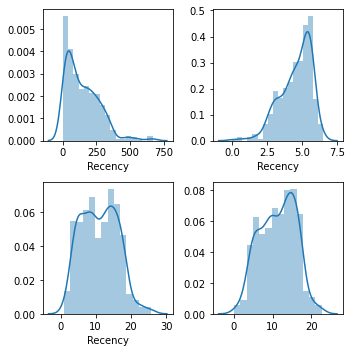

In [86]:
# Analysing which type of data transformation will give us the best from for the Recency column.

analyze_skewness('Recency')

Original data skewness is 6.78
Log of the data has skewness 2.17
Square-root of the data has skewness 3.85
Using the boxcox method on the data give us skewness 1.09


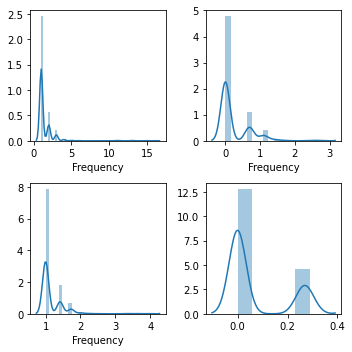

In [87]:
# Analysing which type of data transformation will give us the best from for the Frequency column.

analyze_skewness('Frequency')

5.43
-0.02


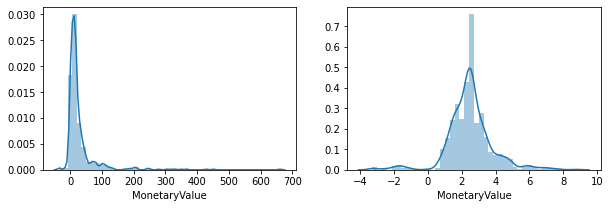

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(10,3)) # create empty figures

sns.distplot(RFM_customers['MonetaryValue'], ax=ax[0]) # distribution plot 1
sns.distplot(np.cbrt(RFM_customers['MonetaryValue']), ax=ax[1])  # distribution plot 2

print(RFM_customers['MonetaryValue'].skew().round(2)) # Fisher-Pearson coefficient of skewnes 
print(np.cbrt(RFM_customers['MonetaryValue']).skew().round(2)) # Return the cube-root of an array, element-wise find it's skew, round number to 2

In [91]:
# Set the Numbers
RFM_customers_new = pd.DataFrame()  # create a new empty dataframe

# assing the series into the dataframe

RFM_customers_new["Recency"] = stats.boxcox(RFM_customers['Recency'])[0] 
RFM_customers_new["Frequency"] = stats.boxcox(RFM_customers['Frequency'])[0]
RFM_customers_new["MonetaryValue"] = pd.Series(np.cbrt(RFM_customers['MonetaryValue'])).values

RFM_customers_new.tail()

,Recency,Frequency,MonetaryValue
675,16.797711,0.000000,2.336164
676,14.512442,0.000000,2.466212
677,12.964363,0.262119,2.207687
678,9.462673,0.000000,2.705339
679,7.500873,0.000000,2.655229


Centering and Scaling Variables using the ```sklearn.preprocessing``` function ```StandardScaler()```.

Documentation on the function can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In [92]:
from sklearn.preprocessing import StandardScaler

#  StandardScaler()

scaler = StandardScaler()
scaler.fit(RFM_customers_new)

RFM_customers_standardized = scaler.transform(RFM_customers_new)

print(RFM_customers_standardized.mean(axis = 0).round(2))
print(RFM_customers_standardized.std(axis = 0).round(2))

[0. 0. 0.]
[1. 1. 1.]


In [93]:
RFM_customers_standardized # this is now an array of the 

array([[-0.30968943,  1.614652  ,  0.4536097 ],
       [-1.07681652, -0.5948903 ,  0.0629917 ],
       [ 1.37262148, -0.5948903 ,  0.66642305],
       ...,
       [ 0.35715587,  1.614652  , -0.20459779],
       [-0.40267518, -0.5948903 ,  0.16165207],
       [-0.82836598, -0.5948903 ,  0.12477304]])

In [94]:
RFM_standardized_df = pd.DataFrame(RFM_customers_standardized, columns={'Frequency', 'MonetaryValue', 'Recency' })

RFM_standardized_df.head(3)

,Recency,MonetaryValue,Frequency
0,-0.309689,1.614652,0.453610
1,-1.076817,-0.594890,0.062992
2,1.372621,-0.594890,0.666423


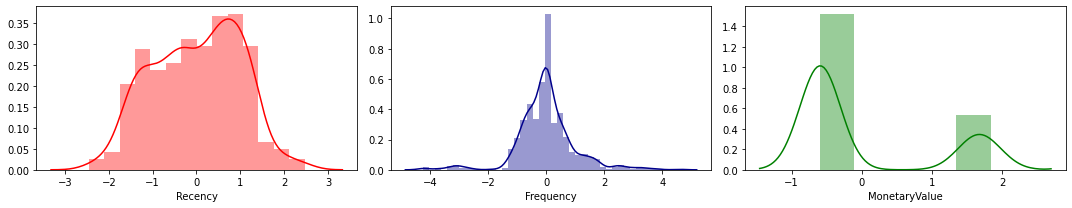

In [95]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))

sns.distplot(RFM_standardized_df['Recency'], ax=ax[0], color='red')
sns.distplot(RFM_standardized_df['Frequency'], ax=ax[1], color='darkblue')
sns.distplot(RFM_standardized_df['MonetaryValue'], ax=ax[2], color='green')

plt.tight_layout()

Data is less skewed and is normalised hence we can now use it to fit our model. 

## Modelling

Choosing the number of clusters: k, using the Elbow method.

In [104]:
from sklearn.cluster import KMeans


# Create an empty list where we will store the Sum of Squared Errors (SEE)
sse = []


# Use a for-loop to calculate the SSE for a range of k-values from 2 clusters to 10 cluster.
for k in range(2, 11):
    
    # # initialize K-means Class 
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # fit the K-means algorithm - perform 10 runs with max 300 iterations
    kmeans.fit(RFM_customers_standardized)
    
    # append the inertia_ metric which is the SSE for each loop to the empty list 
    sse.append(kmeans.inertia_) 


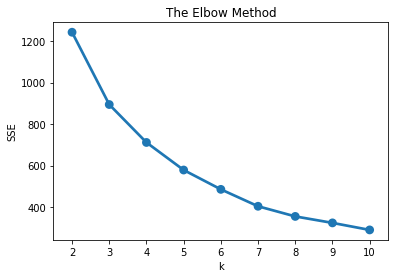

In [101]:
# We can use the list we created to plot the SSE data

x = list(range(2,11))
y = sse

sns.pointplot(x, y)

# Adding Chart name and x and y labels
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE');

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, ```kneed```, to identify the elbow point programmatically:

In [103]:
from kneed import KneeLocator

kl = KneeLocator( range(2, 11), sse, curve="convex", direction="decreasing")

kl.elbow # find best number of clusters

5

Choosing the k-values using the silhouette method.

Note we can ignore clusters of 1 and 2 since their SSE scores are quite high.

In [114]:
from sklearn.metrics import silhouette_score

# Create an empty list that will hold the silhouette coefficients for each k
silhouette_coefficients = []

# Create a loop through the number of clusters again
for k in range(3, 11):
    
    
    # # initialize K-means Class 
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # fit the K-means algorithm - perform 10 runs with max 300 iterations
    kmeans.fit(RFM_customers_standardized)
    
    
    # append the silhouette_score metric and let it be called score
    score = silhouette_score(RFM_customers_standardized, kmeans.labels_)
    
    # append the metric to the empty list 
    silhouette_coefficients.append(score)

The max coef is 0.44795278783542236


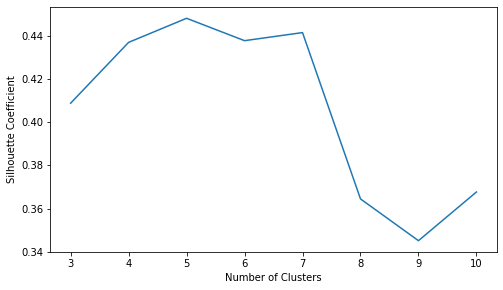

In [115]:
# Plot our figure to visualise the max silhouette coefficient 

plt.figure(figsize=(8, 4.5))

plt.plot(range(3, 11), silhouette_coefficients)

plt.xticks(range(3, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient");

# save your image with this function
#plt.savefig('K-Means_silhouette_Method.png', dpi=None, transparent=True,pad_inches=0.1,);

print('The max coef is {}'.format(max(silhouette_coefficients)))

Using both methods, the Elbow method and the silhouette one, we find that 5 clusters is the ideal number of clusters for this  **sample of data**.

Note this works for this sample of data but might not fit the whole data.

## Fitting our model

In [116]:
model = KMeans(n_clusters=5, random_state=42)

model.fit(RFM_customers_standardized)

model.labels_.shape

(680,)

### Cluster Analysis

Using the ```model.labels_``` to extact the cluster labels for each customer.

We create a new column, called **Cluster** that hosts the cluster numbers for each customer.

Note we add the cluster numbers to the table ***RFM_customers*** where the values of each column are the original values.

In [120]:
RFM_customers["Cluster"] = model.labels_
RFM_customers.head()

,Frequency,MonetaryValue,Recency,Cluster
CustomerID,,,,
12352.0,2,29.85,82,1
12371.0,1,17.00,31,2
12373.0,1,39.00,343,0
12378.0,1,12.50,306,0
12395.0,1,5.04,220,0


In [121]:
RFM_customers.reset_index()

,CustomerID,Frequency,MonetaryValue,Recency,Cluster
0,12352.0,2,29.85,82,1
1,12371.0,1,17.00,31,2
2,12373.0,1,39.00,343,0
3,12378.0,1,12.50,306,0
4,12395.0,1,5.04,220,0
...,...,...,...,...,...
675,18245.0,1,12.75,302,0
676,18257.0,1,15.00,208,0
677,18263.0,2,10.76,157,1
678,18265.0,1,19.80,74,2


**We can aggregate the table to extract the answers to the following questions.**

- How many customers per cluster?

- What is the average monetary value spent per cluster?

- What is the average frequency per cluster?

- What is the average Recency per cluster? 


In [ ]:
# Resetting the index of our dataframe so that we can group by the CustomerID too. 

RFM_customers = RFM_customers.reset_index()

In [138]:
RFM_customers.groupby('Cluster').agg({'CustomerID':'count' ,'Recency':'mean', 'Frequency':'mean','MonetaryValue':['mean','sum']}).round(1)

CustomerID Recency Frequency MonetaryValue        
             count    mean      mean          mean     sum
Cluster                                                   
0              279   254.6       1.0          18.9  5267.6
1              147    89.1       2.5          23.3  3418.6
2              196    51.2       1.0          17.3  3396.3
3               19   164.5       1.1         -10.6  -201.2
4               39    97.3       3.4         202.2  7885.4

We can see that:

- **Group 0** consists of the most number of customers, that are have not shopped recently and they are not frequent shoppers. They have the on average a high spend per customer of £18.90. SInce they haven't shopped in 254 days (on avr), we can say thet the cluster consists of **churned customers**. 

- **Group 1** has a lot of customers too, which are more frequent but haven't shopped recently. They tend to spend more per visit and visit more frequently. We can say they might be more loyal than Group 0. We can say they are **new or existant customers** but not loyal. 

- **Group 2** has similar metrics to group 0 but they have shopped recently. We can say they are **new customers**.

- **Group 3** seems to be the group which consists of customers who have returned items recently.

- **Group 4** is the group with most **loyal shoppers** who tend to be frequent, spend a lot per shop (avr £202.20) and have recently bought something.

We can assign customers to different clusters and identify their shopping habits in order to target them 

### References
Daqing C., Sai L.S, and Kun G., Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining (2012), Journal of Database Marketing and Customer Strategy Management.<br>
K. Jarrod Millman and Michael Aivazis. Python for Scientists and Engineers(2011). Computing in Science & Engineering.<br>
With help from 
https://towardsdatascience.com/customer-segmentation-in-python-9c15acf6f945 